In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import math
import seaborn as sns
from statsmodels.tsa.holtwinters import ExponentialSmoothing, SimpleExpSmoothing, Holt
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import Dense, LSTM, Dropout, Input, TimeDistributed, RepeatVector
from sklearn.metrics import mean_squared_error as MSE
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.seasonal import seasonal_decompose

sns.set_style('whitegrid')
%matplotlib inline
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'xx-large',
          'figure.figsize': (10, 6),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':16,
         'ytick.labelsize':16}
pylab.rcParams.update(params)

In [6]:
amzn_df = pd.read_csv('Data/AMZN.csv', index_col='Date')
train = amzn_df[:"2017-12-31"]
test = amzn_df["2018-01-01":]
print (train.shape)
print (test.shape)

(755, 6)
(251, 6)


In [7]:
test['Close']

Date
2018-01-02    1189.010010
2018-01-03    1204.199951
2018-01-04    1209.589966
2018-01-05    1229.140015
2018-01-08    1246.869995
                 ...     
2018-12-24    1343.959961
2018-12-26    1470.900024
2018-12-27    1461.640015
2018-12-28    1478.020020
2018-12-31    1501.969971
Name: Close, Length: 251, dtype: float64

Text(0.5, 1.0, 'Amazon')

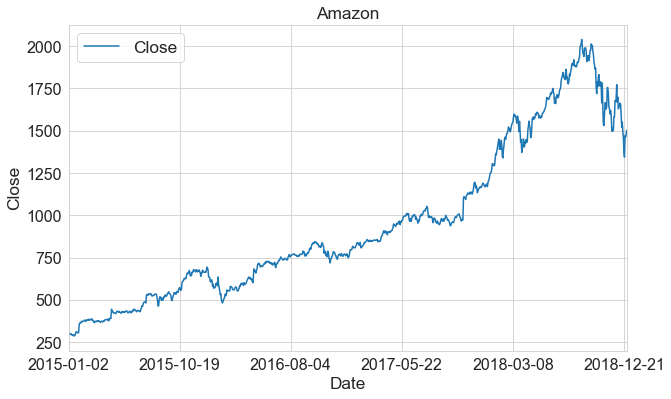

In [3]:
ax = amzn_df['Close'].plot(figsize=(10, 6))
plt.ylabel('Close')
plt.xlabel('Date')
plt.legend(loc = 'best')
plt.title("Amazon")

F:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
F:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


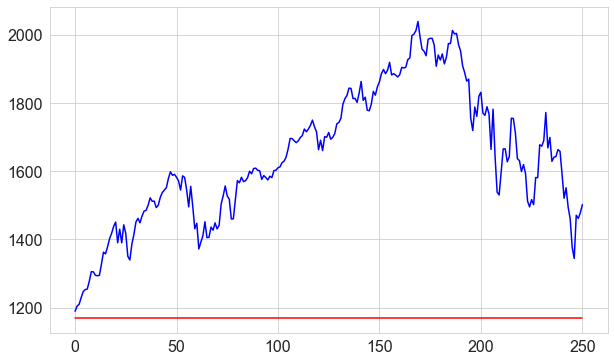

In [20]:
simp = SimpleExpSmoothing(train['Close']).fit()
fig = plt.figure(figsize=(10, 6))
simp_fcast = simp.forecast(251).values
plt.plot(test['Close'].values, color='blue')
plt.plot(simp_fcast, color='red')


In [26]:
print ("Test RMSE is {}".format(math.sqrt(MSE(test['Close'], simp_fcast))))

Test RMSE is 511.6525474156045


F:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
F:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


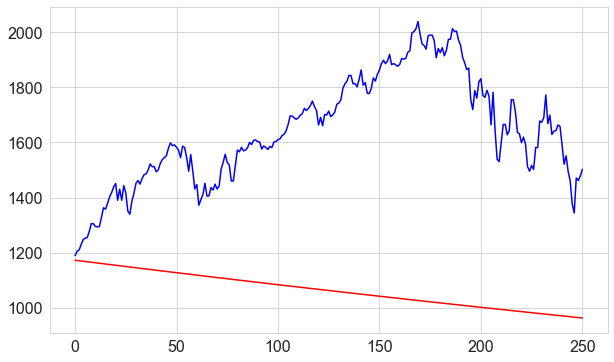

In [23]:
ht = Holt(train['Close'], exponential = True).fit(smoothing_level = 0.8, smoothing_slope = 0.2)
fig = plt.figure(figsize=(10, 6))
ht_fcast = ht.forecast(251).values
plt.plot(test['Close'].values, color='blue')
plt.plot(ht_fcast, color='red')

In [33]:
print ("Test RMSE is {}".format(math.sqrt(MSE(test['Close'], ht_fcast))))

Test RMSE is 625.2484473438436


F:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
F:\Anaconda\lib\site-packages\statsmodels\tsa\holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
F:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


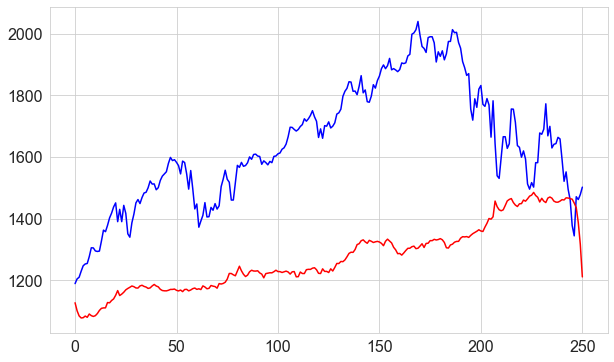

In [25]:
hw1 = ExponentialSmoothing(train['Close'], seasonal_periods= 251,
                           trend = 'add', seasonal='add',damped = True).fit()
fig = plt.figure(figsize=(10, 6))
hw1_fcast = hw1.forecast(251).values
plt.plot(test['Close'].values, color='blue')
plt.plot(hw1_fcast, color='red')

In [36]:
print ("Test RMSE is {}".format(math.sqrt(MSE(test['Close'], hw1_facst))))

Test RMSE is 407.3013000492031
